# Final project of IBM Data Science Professional Certification

Part I: Set up Github account & upload JupyterNotebook into my own Github

In [1]:
#Prepare the environment
#install pydotplus
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
#!conda install -c conda-forge folium=0.5.0 --yes

In [2]:
#import the required library
import pandas as pd
import numpy as np

#import other libraries used later
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import pylab as pl

In [3]:
# print Hello Capstone Project Course!
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Understand the Data

In [4]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path,dtype = {'SPEEDING':np.str,'ST_COLCODE':np.str})
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [8]:
df.shape

(194673, 38)

In [9]:
#check the severity code
severity_code = df['SEVERITYCODE'].value_counts().to_frame()
severity_code.head()

,SEVERITYCODE
1,136485
2,58188


In [10]:
road_cond = df['ROADCOND'].value_counts().to_frame()
road_cond.head(10)

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [11]:
light_cond = df['LIGHTCOND'].value_counts().to_frame()
light_cond.head()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502


In [12]:
ped_count = df['PEDCOUNT'].value_counts().to_frame()
ped_count.head()

,PEDCOUNT
0,187734
1,6685
2,226
3,22
4,4


In [13]:
pedcycle_count = df['PEDCYLCOUNT'].value_counts().to_frame()
pedcycle_count.head()

,PEDCYLCOUNT
0,189189
1,5441
2,43


In [14]:
add_type = df['ADDRTYPE'].value_counts().to_frame()
add_type.head()

,ADDRTYPE
Block,126926
Intersection,65070
Alley,751


In [15]:
#missing data?
df.replace("?", np.nan, inplace = True)
missing_data = df.isnull()
print("data missing",missing_data.head())
print("data missing size",missing_data.shape)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

data missing    SEVERITYCODE      X      Y  OBJECTID  INCKEY  COLDETKEY  REPORTNO  STATUS  \
0         False  False  False     False   False      False     False   False   
1         False  False  False     False   False      False     False   False   
2         False  False  False     False   False      False     False   False   
3         False  False  False     False   False      False     False   False   
4         False  False  False     False   False      False     False   False   

   ADDRTYPE  INTKEY  ...  ROADCOND  LIGHTCOND  PEDROWNOTGRNT  SDOTCOLNUM  \
0     False   False  ...     False      False           True        True   
1     False    True  ...     False      False           True       False   
2     False    True  ...     False      False           True       False   
3     False    True  ...     False      False           True        True   
4     False   False  ...     False      False           True       False   

   SPEEDING  ST_COLCODE  ST_COLDESC  SEGLANEKEY  

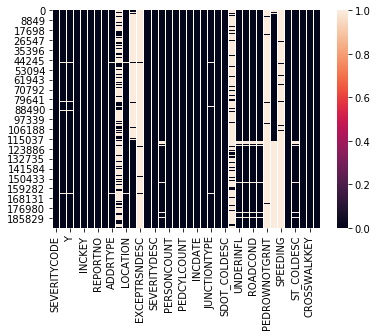

In [16]:
#heatmap of missing data
sns.heatmap(missing_data)

In [17]:
#Filling missing data for the categorical data
df["PEDROWNOTGRNT"].replace(np.nan, 'N', inplace=True)
df["UNDERINFL"].replace(np.nan, 'N', inplace=True)
df["SPEEDING"].replace(np.nan, 'N', inplace=True)
df["UNDERINFL"].replace('0', 'N', inplace=True)

#Inattention missing data: with Underinfle factor, assuming Underinfle = Y, the missing inattention shall be "Y". Others are "N"
df["INATTENTIONIND"].replace(np.nan, 'N', inplace=True)
df.loc[df["UNDERINFL"]=='Y','INATTENTIONIND'] = 'Y'
#filling weathercond,roadcond and lightcond with 'Unknown' considering the amount is not that significant
#convert to low string
df['ROADCOND'] = df['ROADCOND'].str.lower()
df['WEATHER'] = df['WEATHER'].str.lower()
df['LIGHTCOND'] = df['LIGHTCOND'].str.lower()
df['ADDRTYPE'] = df['ADDRTYPE'].str.lower()
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].str.lower()
df["ROADCOND"].replace(np.nan, 'unknown', inplace=True)
df["WEATHER"].replace(np.nan, 'unknown', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'unknown', inplace=True)
df["JUNCTIONTYPE"].replace(np.nan, 'unknown', inplace=True)
#check whether it is related to particular day of week or weekend
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['dayofweek'] = df['INCDATE'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,intersection,37475.0,...,N,NaN,N,10,Entering at angle,0,0,N,2,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,block,NaN,...,N,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N,2,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,block,NaN,...,N,4323031.0,N,32,One parked--one moving,0,0,N,3,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,block,NaN,...,N,NaN,N,23,From same direction - all others,0,0,N,4,1
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,intersection,34387.0,...,N,4028032.0,N,10,Entering at angle,0,0,N,2,0


In [18]:
#Chi-square test whether # of severity is corrlelated to ADDRTYPE
from scipy import stats
from scipy.stats import chi2_contingency
sub_df1 = df.loc[:,['ADDRTYPE','SEVERITYCODE']]
#severity_code = sub_df.groupby(sub_df['SEVERITYCODE'])
#severity_code1 = severity_code.get_group(1)
#severity_code2 = severity_code.get_group(2)
#pd.concat([severity_code1,severity_code2])

chi_table = pd.crosstab(index=sub_df1['ADDRTYPE'],columns=sub_df1['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic for ADDRTYPE vs SEVERITYCODE is',tstatics,'with P-value:',p)


Chi-Square test statistic for ADDRTYPE vs SEVERITYCODE is 7545.818380090731 with P-value: 0.0


# The Chi-Square analysis demontrated that SEVEIRTY CODE is associated with ADDRTYPE

In [19]:
sub_df2 = df.loc[:,['ROADCOND','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df2['ROADCOND'],columns=sub_df2['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic ROADCOND vs SEVERITYCODEis',tstatics,'with P-value:',p)

Chi-Square test statistic ROADCOND vs SEVERITYCODEis 4856.908569911719 with P-value: 0.0


# The Chi-Square analysis demontrated that SEVEIRTY CODE is associated with ROADCOND

In [20]:
sub_df3 = df.loc[:,['INATTENTIONIND','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df3['INATTENTIONIND'],columns=sub_df3['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic INATTENTIONIND vs SEVERITYCODEis',tstatics,'with P-value:',p)

Chi-Square test statistic INATTENTIONIND vs SEVERITYCODEis 579.5287057124053 with P-value: 4.748942382884726e-128


# The Chi-Square analysis demontrated that SEVEIRTY CODE is associated with INATTENTIONIND

In [21]:
sub_df4 = df.loc[:,['dayofweek','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df4['dayofweek'],columns=sub_df4['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic DayofWeek vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table)

Chi-Square test statistic DayofWeek vs SEVERITYCODE is 73.53738345301187 with P-value: 7.675352148084809e-14
SEVERITYCODE      1     2
dayofweek                
0             18365  7973
1             19825  8731
2             20021  8757
3             20306  9018
4             22774  9559
5             19342  8047
6             15852  6103


In [22]:
sub_df5 = df.loc[:,['weekend','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df5['weekend'],columns=sub_df5['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic Weekend vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table)

Chi-Square test statistic Weekend vs SEVERITYCODE is 49.8659096135808 with P-value: 1.6462013144613948e-12
SEVERITYCODE      1      2
weekend                   
0             78517  34479
1             57968  23709


In [23]:
sub_df6 = df.loc[:,['PEDROWNOTGRNT','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df6['PEDROWNOTGRNT'],columns=sub_df6['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic PEDROWNOTGRNT vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table)

Chi-Square test statistic PEDROWNOTGRNT vs SEVERITYCODE is 8280.91833260777 with P-value: 0.0
SEVERITYCODE        1      2
PEDROWNOTGRNT               
N              136025  53981
Y                 460   4207


In [24]:
sub_df7 = df.loc[:,['HITPARKEDCAR','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df7['HITPARKEDCAR'],columns=sub_df7['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic for HITPARKEDCAR vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table)

Chi-Square test statistic for HITPARKEDCAR vs SEVERITYCODE is 2004.3112353350816 with P-value: 0.0
SEVERITYCODE       1      2
HITPARKEDCAR               
N             129717  57740
Y               6768    448


In [25]:
sub_df8 = df.loc[:,['JUNCTIONTYPE','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df8['JUNCTIONTYPE'],columns=sub_df8['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic for JUNCTIONTYPE vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table,'\n', ex)

Chi-Square test statistic for JUNCTIONTYPE vs SEVERITYCODE is 10027.812765549645 with P-value: 0.0
SEVERITYCODE                                           1      2
JUNCTIONTYPE                                                   
at intersection (but not related to intersection)   1475    623
at intersection (intersection related)             35636  27174
driveway junction                                   7437   3234
mid-block (but intersection related)               15493   7297
mid-block (not related to intersection)            70396  19404
ramp junction                                        112     54
unknown                                             5936    402 
 [[1.47090521e+03 6.27094790e+02]
 [4.40360135e+04 1.87739865e+04]
 [7.48142493e+03 3.18957507e+03]
 [1.59780409e+04 6.81195913e+03]
 [6.29586692e+04 2.68413308e+04]
 [1.16382395e+02 4.96176049e+01]
 [4.44356398e+03 1.89443602e+03]]


In [26]:
sub_df9 = df.loc[:,['COLLISIONTYPE','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df9['COLLISIONTYPE'],columns=sub_df9['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic for COLLISIONTYPE vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table,'\n', ex)

Chi-Square test statistic for COLLISIONTYPE vs SEVERITYCODE is 41078.55686500804 with P-value: 0.0
SEVERITYCODE       1      2
COLLISIONTYPE              
Angles         21050  13624
Cycles           671   4744
Head On         1152    872
Left Turn       8292   5411
Other          17591   6112
Parked Car     45325   2662
Pedestrian       672   5936
Rear Ended     19419  14671
Right Turn      2347    609
Sideswipe      16103   2506 
 [[24232.2783384  10441.7216616 ]
 [ 3784.32794608  1630.67205392]
 [ 1414.493031     609.506969  ]
 [ 9576.48122718  4126.51877282]
 [16565.083159    7137.916841  ]
 [33536.20409024 14450.79590976]
 [ 4618.06815655  1989.93184345]
 [23824.14398558 10265.85601442]
 [ 2065.83073105   890.16926895]
 [13005.08933493  5603.91066507]]


In [27]:
sub_df10 = df.loc[:,['SDOT_COLCODE','SEVERITYCODE']]

chi_table = pd.crosstab(index=sub_df10['SDOT_COLCODE'],columns=sub_df10['SEVERITYCODE'])
tstatics,p,dof,ex = chi2_contingency(chi_table)
print ('Chi-Square test statistic for SDOT_COLCODE vs SEVERITYCODE is',tstatics,'with P-value:',p)
print(chi_table,'\n', ex)

Chi-Square test statistic for SDOT_COLCODE vs SEVERITYCODE is 28449.7212282126 with P-value: 0.0
SEVERITYCODE      1      2
SDOT_COLCODE              
0              9079    708
11            60871  24338
12             1413     27
13             5653    199
14            36551  17748
15             1529     75
16             9236    692
18              370   2734
21               41    140
22                1     16
23               31     93
24              665   5853
25               82     20
26             3568   1173
27              130     36
28             6574   2282
29              118    361
31               97      7
32               11      1
33               51      2
34               84      9
35                5      1
36                3      1
44                0      8
46                3      0
47                1      0
48               96     11
51              152   1160
52                1      1
53                2      7
54               32    107
55          

In [28]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,dayofweek,weekend
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093,-0.015246,-0.016016
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586,-0.008483,-0.008581
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508,-0.005615,-0.005504
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046,-0.014516,-0.019058
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179,-0.014183,-0.018599
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063,-0.014173,-0.018587
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420,0.000932,0.002443
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093,-0.015246,-0.016016
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258,0.058063,0.057397
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326,-0.019643,-0.016885


In [29]:
#Import statistic analysis

pearson_coef, p_value = stats.pearsonr(df['SEVERITYCODE'], df['PEDCOUNT'])
print ('The coefficiency fro PEDCOUNT is',pearson_coef, 'with P-value:',p_value)

The coefficiency fro PEDCOUNT is 0.24633815772800446 with P-value: 0.0


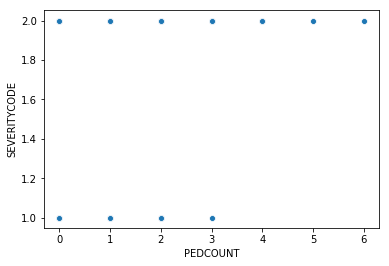

In [30]:
sns.scatterplot(x='PEDCOUNT',y='SEVERITYCODE',data=df)

In [31]:
pearson_coef, p_value = stats.pearsonr(df['SEVERITYCODE'], df['CROSSWALKKEY'])
print ('The coefficiency for CROSSWALKKEY is',pearson_coef, 'with P-value:',p_value)

The coefficiency for CROSSWALKKEY is 0.17509341248217725 with P-value: 0.0


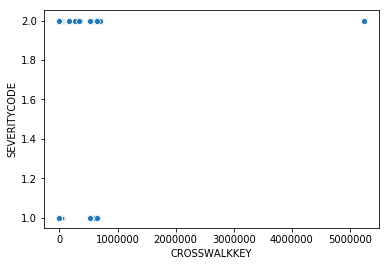

In [32]:
sns.scatterplot(x='CROSSWALKKEY',y='SEVERITYCODE',data=df)

In [33]:
pearson_coef, p_value = stats.pearsonr(df['SEVERITYCODE'], df['SDOTCOLNUM'])
print ('The coefficiency for SDOTCOLNUM is',pearson_coef, 'with P-value:',p_value)

The coefficiency for SDOTCOLNUM is nan with P-value: 1.0


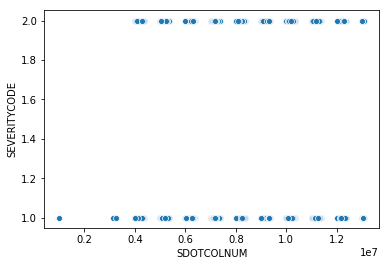

In [34]:
sns.scatterplot(x='SDOTCOLNUM',y='SEVERITYCODE',data=df)

In [35]:
pearson_coef, p_value = stats.pearsonr(df['SEVERITYCODE'], df['SEGLANEKEY'])
print ('The coefficiency for SEGLANEKEY is',pearson_coef, 'with P-value:',p_value)

The coefficiency for SEGLANEKEY is 0.10427570827114907 with P-value: 0.0


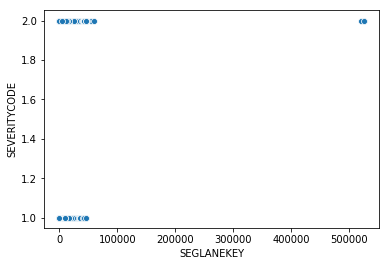

In [36]:
sns.scatterplot(x='SEGLANEKEY',y='SEVERITYCODE',data=df)

In [37]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR', 'dayofweek', 'weekend'], dtype=object)

In [38]:
#get the necessary data
Features = df.loc[:,['X','Y','SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','SDOT_COLCODE','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','dayofweek','weekend']]

In [39]:
Features.head()

,X,Y,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
0,-122.323148,47.703140,2,intersection,Angles,2,0,0,2,N,...,wet,daylight,N,N,11,0,0,N,2,0
1,-122.347294,47.647172,1,block,Sideswipe,2,0,0,2,N,...,wet,dark - street lights on,N,N,16,0,0,N,2,0
2,-122.334540,47.607871,1,block,Parked Car,4,0,0,3,N,...,dry,daylight,N,N,14,0,0,N,3,0
3,-122.334803,47.604803,1,block,Other,3,0,0,3,N,...,dry,daylight,N,N,11,0,0,N,4,1
4,-122.306426,47.545739,2,intersection,Angles,2,0,0,2,N,...,wet,daylight,N,N,11,0,0,N,2,0


In [40]:
#drop NaN rows
Features.dropna(axis=0,inplace=True)
#check whether there is empty value
checking_data = Features.isnull()

for column in checking_data.columns.values.tolist():
    print(column)
    print (checking_data[column].value_counts())
    print("") 

#Data size
Features.shape

X
False    184582
Name: X, dtype: int64

Y
False    184582
Name: Y, dtype: int64

SEVERITYCODE
False    184582
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    184582
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    184582
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    184582
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    184582
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    184582
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    184582
Name: VEHCOUNT, dtype: int64

INATTENTIONIND
False    184582
Name: INATTENTIONIND, dtype: int64

JUNCTIONTYPE
False    184582
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    184582
Name: WEATHER, dtype: int64

ROADCOND
False    184582
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184582
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    184582
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    184582
Name: SPEEDING, dtype: int64

SDOT_COLCODE
False    184582
Name: SDOT_COLCODE, dtype: int64

SEGLANEKEY
False    18458

(184582, 22)

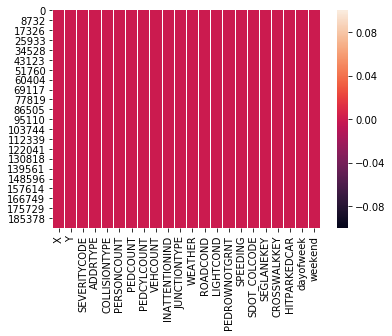

In [41]:
#Data Visualization - Heatmap
sns.heatmap(checking_data)

# Data Visualication

In [42]:
#Incident map
import folium
from folium import plugins

latitude = 47.61
longitude = -122.33
# let's start again with a clean copy of the map of Seatle
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'OpenStreetMap')

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster (considering resourse consumption, only check the first1000 data points)
for lat, lng, in zip(Features.head(1000).Y, Features.head(1000).X):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# display map
seattle_map

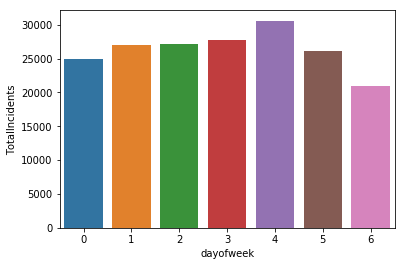

In [43]:
#incidents count distribution with day of week
week_dist = Features.groupby(['dayofweek']).size().reset_index(name='TotalIncidents')
sns.barplot(x='dayofweek',y='TotalIncidents',data=week_dist)

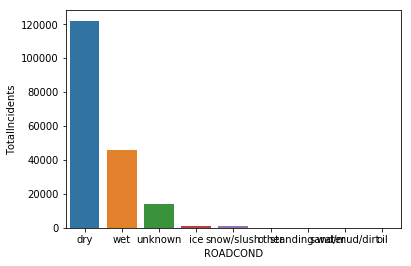

In [44]:
#incidents count distribution with ROADCOND
road_dist = Features.groupby(['ROADCOND']).size().reset_index(name='TotalIncidents')
road_dist.sort_values('TotalIncidents',ascending = False,inplace=True)
sns.barplot(x='ROADCOND',y='TotalIncidents',data=road_dist)

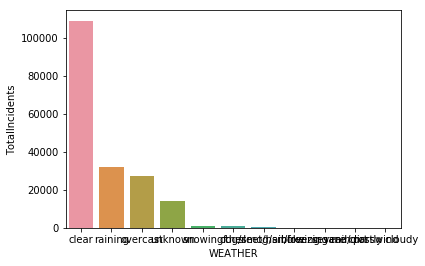

In [45]:
#incidents count distribution with Weather
weather_dist = Features.groupby(['WEATHER']).size().reset_index(name='TotalIncidents')
weather_dist.sort_values('TotalIncidents',ascending = False,inplace=True)
sns.barplot(x='WEATHER',y='TotalIncidents',data=weather_dist)

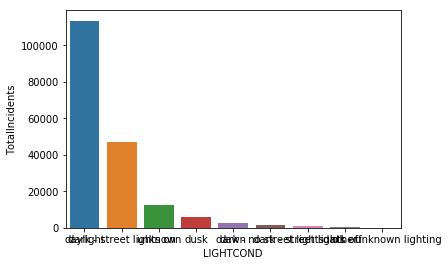

In [46]:
#incidents count distribution with LIGHTCOND
light_dist = Features.groupby(['LIGHTCOND']).size().reset_index(name='TotalIncidents')
light_dist.sort_values('TotalIncidents',ascending = False,inplace=True)
sns.barplot(x='LIGHTCOND',y='TotalIncidents',data=light_dist)

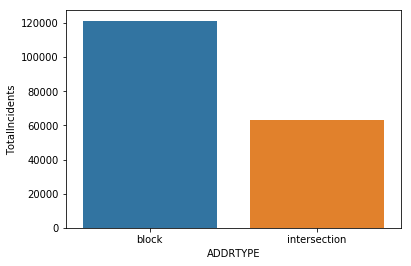

In [47]:
#incidents count distribution with ADDRTYPE
address_dist = Features.groupby(['ADDRTYPE']).size().reset_index(name='TotalIncidents')
address_dist.sort_values('TotalIncidents',ascending = False,inplace=True)
sns.barplot(x='ADDRTYPE',y='TotalIncidents',data=address_dist)

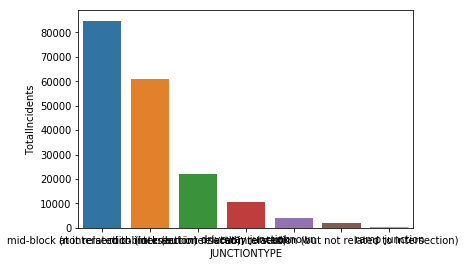

In [48]:
#incidents count distribution with ADDRTYPE
junction_dist = Features.groupby(['JUNCTIONTYPE']).size().reset_index(name='TotalIncidents')
junction_dist.sort_values('TotalIncidents',ascending = False,inplace=True)
sns.barplot(x='JUNCTIONTYPE',y='TotalIncidents',data=junction_dist)

# Tranform the data & Build and verify prediction model 

In [49]:
#Encode the categorical value
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
dataset = Features
cat_encode = LabelEncoder()
dataset['ADDRTYPE'] = cat_encode.fit_transform(dataset['ADDRTYPE'])
dataset['INATTENTIONIND'] = cat_encode.fit_transform(dataset['INATTENTIONIND'])
dataset['WEATHER'] = cat_encode.fit_transform(dataset['WEATHER'])
dataset['ROADCOND'] = cat_encode.fit_transform(dataset['ROADCOND'])
dataset['LIGHTCOND'] = cat_encode.fit_transform(dataset['LIGHTCOND'])
dataset['PEDROWNOTGRNT'] = cat_encode.fit_transform(dataset['PEDROWNOTGRNT'])
dataset['SPEEDING'] = cat_encode.fit_transform(dataset['SPEEDING'])
dataset['PEDROWNOTGRNT'] = cat_encode.fit_transform(dataset['PEDROWNOTGRNT'])
dataset['JUNCTIONTYPE'] = cat_encode.fit_transform(dataset['JUNCTIONTYPE'])
dataset['COLLISIONTYPE'] = cat_encode.fit_transform(dataset['COLLISIONTYPE'])
dataset['HITPARKEDCAR'] = cat_encode.fit_transform(dataset['HITPARKEDCAR'])

In [50]:
dataset.head()

,X,Y,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
0,-122.323148,47.703140,2,1,0,2,0,0,2,0,...,8,5,0,0,11,0,0,0,2,0
1,-122.347294,47.647172,1,0,9,2,0,0,2,0,...,8,2,0,0,16,0,0,0,2,0
2,-122.334540,47.607871,1,0,5,4,0,0,3,0,...,0,5,0,0,14,0,0,0,3,0
3,-122.334803,47.604803,1,0,4,3,0,0,3,0,...,0,5,0,0,11,0,0,0,4,1
4,-122.306426,47.545739,2,1,0,2,0,0,2,0,...,8,5,0,0,11,0,0,0,2,0


In [51]:
dataset.corr()

,X,Y,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
X,1.000000,-0.160095,0.010375,0.005393,0.010696,0.012787,0.011346,-0.001801,-0.015710,-0.022033,...,0.000267,0.010026,0.008413,-0.008364,0.011004,-0.001803,0.014233,-0.016419,-0.008652,-0.008449
Y,-0.160095,1.000000,0.018337,0.034231,-0.038915,-0.014000,0.010344,0.026728,0.020630,0.006281,...,0.008060,0.024464,0.022287,-0.026911,-0.019808,0.004545,0.009637,-0.012385,-0.005819,-0.005699
SEVERITYCODE,0.010375,0.018337,1.000000,0.200601,-0.129741,0.127633,0.248506,0.216213,-0.085068,0.051586,...,-0.046302,-0.057011,0.208597,0.037518,0.182845,0.104947,0.176489,-0.102051,-0.017183,-0.018251
ADDRTYPE,0.005393,0.034231,0.200601,1.000000,-0.481823,0.062622,0.145904,0.084045,-0.095974,-0.084555,...,-0.026710,-0.051536,0.157336,-0.056752,-0.035102,0.037912,0.178108,-0.130499,-0.011869,-0.010251
COLLISIONTYPE,0.010696,-0.038915,-0.129741,-0.481823,1.000000,0.012533,0.094323,-0.213623,0.103101,0.112976,...,-0.001528,0.030481,-0.020357,-0.003201,0.002707,-0.097611,0.033983,0.036961,-0.016799,-0.014111
PERSONCOUNT,0.012787,-0.014000,0.127633,0.062622,0.012533,1.000000,-0.026978,-0.042390,0.395466,0.071808,...,-0.028803,-0.039712,-0.030526,-0.001623,-0.142715,-0.022650,-0.034727,-0.052890,0.058679,0.057849
PEDCOUNT,0.011346,0.010344,0.248506,0.145904,0.094323,-0.026978,1.000000,-0.018241,-0.321469,-0.002146,...,0.007042,-0.039898,0.495414,-0.033370,0.270182,0.001427,0.571162,-0.035661,-0.020704,-0.017856
PEDCYLCOUNT,-0.001801,0.026728,0.216213,0.084045,-0.213623,-0.042390,-0.018241,1.000000,-0.310774,-0.001879,...,-0.049668,0.012931,0.322998,-0.020694,0.397357,0.456772,0.109711,-0.030453,-0.026050,-0.028079
VEHCOUNT,-0.015710,0.020630,-0.085068,-0.095974,0.103101,0.395466,-0.321469,-0.310774,1.000000,0.042196,...,-0.013608,0.030351,-0.280326,-0.040702,-0.468722,-0.147298,-0.241565,0.069331,0.005971,0.004667
INATTENTIONIND,-0.022033,0.006281,0.051586,-0.084555,0.112976,0.071808,-0.002146,-0.001879,0.042196,1.000000,...,-0.052388,-0.057893,-0.032629,-0.026465,0.052844,-0.002795,-0.003857,0.027361,0.003659,0.001994


In [52]:
# data preparation
from sklearn.model_selection import train_test_split
X = np.asarray(dataset[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','SDOT_COLCODE','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','dayofweek','weekend']])
X[0:5]

array([[ 1,  0,  2,  0,  0,  2,  0,  1,  4,  8,  5,  0,  0, 11,  0,  0,
         0,  2,  0],
       [ 0,  9,  2,  0,  0,  2,  0,  4,  6,  8,  2,  0,  0, 16,  0,  0,
         0,  2,  0],
       [ 0,  5,  4,  0,  0,  3,  0,  4,  4,  0,  5,  0,  0, 14,  0,  0,
         0,  3,  0],
       [ 0,  4,  3,  0,  0,  3,  0,  4,  1,  0,  5,  0,  0, 11,  0,  0,
         0,  4,  1],
       [ 1,  0,  2,  0,  0,  2,  0,  1,  6,  8,  5,  0,  0, 11,  0,  0,
         0,  2,  0]])

In [53]:
y = np.asarray(dataset['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2])

In [54]:
#normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.38540755, -1.60088434, -0.34423279, -0.19177846, -0.17342323,
         0.04747219, -0.4712898 , -1.22886795,  0.33603128,  1.49217551,
         0.35599693, -0.16061596, -0.222662  , -0.45360246, -0.08245718,
        -0.13794884, -0.19415094, -0.49060608, -0.8520664 ],
       [-0.72180926,  1.6151249 , -0.34423279, -0.19177846, -0.17342323,
         0.04747219, -0.4712898 ,  0.8459012 ,  1.04308614,  1.49217551,
        -1.40464357, -0.16061596, -0.222662  ,  0.2918873 , -0.08245718,
        -0.13794884, -0.19415094, -0.49060608, -0.8520664 ],
       [-0.72180926,  0.18578746,  1.12835405, -0.19177846, -0.17342323,
         1.84491063, -0.4712898 ,  0.8459012 ,  0.33603128, -0.70449087,
         0.35599693, -0.16061596, -0.222662  , -0.00630861, -0.08245718,
        -0.13794884, -0.19415094,  0.02943625, -0.8520664 ],
       [-0.72180926, -0.1715469 ,  0.39206063, -0.19177846, -0.17342323,
         1.84491063, -0.4712898 ,  0.8459012 , -0.724551  , -0.70449087,
         0.355

In [55]:
#dataset split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (129207, 19) (129207,)
Test set: (55375, 19) (55375,)


In [56]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print('the LogisticR Loss value is: ', log_loss(y_test, yhat_prob))
print('the LogisticR Jaccard Score is: ',jaccard_similarity_score(y_test, yhat))
print('the LogisticR F1 Score is: ',f1_score(y_test, yhat))

the LogisticR Loss value is:  0.5213520892767424
the LogisticR Jaccard Score is:  0.7507178329571106
the LogisticR F1 Score is:  0.8439555967534083


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


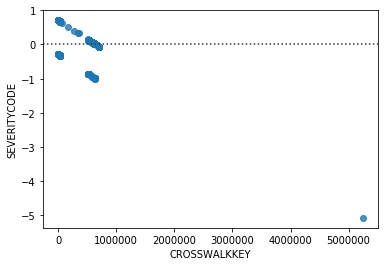

In [57]:
#check residual plot
sns.residplot(x='CROSSWALKKEY',y='SEVERITYCODE',lowess=True,data=dataset)

In [58]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

TrafficTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
TrafficTree.fit(X_train,y_train)
pred_dtree = TrafficTree.predict(X_test)
print("The DT Avg F1-score: %.4f" % f1_score(y_test, pred_dtree, average='weighted'))
print("The DT Jaccard score: %.4f" % jaccard_similarity_score(y_test, pred_dtree))

The DT Avg F1-score: 0.7168
The DT Jaccard score: 0.7581


In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "Traffictree.png"
featureNames = dataset.columns[3:23]
targetNames = dataset["SEVERITYCODE"].astype('str').unique().tolist()
out=tree.export_graphviz(TrafficTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')